## Table of Contents
* [Setup](#setup)
* [Dataset 1: Pokemon with stats](#ds1)
    * [Data Preprocessing and Manipulation](#dpm1)
    * [Data Visualization](#dv1)
* [Dataset 2: Cryptocurrencies](#ds2)
    * [Data Preprocessing and Manipulation](#dpm2)
    * [Data Visualization](#dv2)

<a id='setup'></a>
# Setup
____

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn==0.9.0

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
import re
import datetime
%matplotlib inline

<a id='ds1'></a>
# Dataset 1: Pokemon with stats
___

### Background:
Link to Dataset: https://www.kaggle.com/abcsds/pokemon
<br>
Description: 
<br>
721 Pokemon with stats and types. 

From the Kaggle link: 
<br>
"This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. It has been of great use when teaching statistics to kids. With certain types you can also give a geeky introduction to machine learning.

This are the raw attributes that are used for calculating how much damage an attack will do in the games. This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go)."

This dataset features 721 pokemon (up to the 6th generation) and shows their types and stats. The information can be immediatelty gathered from 
<ul>
    <li>pokemon.com</li>
    <li>pokemondb</li>
    <li>bulbapedia</li>
</ul>

Analyzing this data set will provide useful information and interesting facts for Pokemon enthusiats and Pokemon gamers.

Since the dataset provides many useful information on stats of each Pokemon, their types, and whether they are legendary or not, we can analyze the data based one:

<ul>
    <li>Distribution of each Pokemon type</li>
    <li>Highest pokemon stats of each type</li>
    <li>Correlation between speed and total stats</li>
    <li>Correlation between attack and defense</li>
    <li>Number of legendary Pokemons in each generation</li>
</ul>

By providing these types of analysis, Pokemon enthusiats can get a better idea of how Pokemon attributes are distributed in the Pokemon game.

<a id='dpm1'></a>
## Data Preprocessing and Manipulation

Please download the "Pokemon.csv" file into folder containing this jupeter notebook. Below shows the first five columns of the dataframe where the dataset is indexed under Pokemon names.

In [2]:
pokemon_data = pd.read_csv("Pokemon.csv", index_col = "Name")
pokemon_data.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


<a id='dv1'></a>
##   Data Visualization

<b> 1. Pie chart distribution of each Pokemon type </b>
<br>
This shows the distribution of Pokemon by their Pokemon types.

In [3]:
pokemon_types = pokemon_data.groupby('Type 1').count()
pokemon_types.head()

,#,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,,
Bug,69,52,69,69,69,69,69,69,69,69,69
Dark,31,21,31,31,31,31,31,31,31,31,31
Dragon,32,21,32,32,32,32,32,32,32,32,32
Electric,44,17,44,44,44,44,44,44,44,44,44
Fairy,17,2,17,17,17,17,17,17,17,17,17


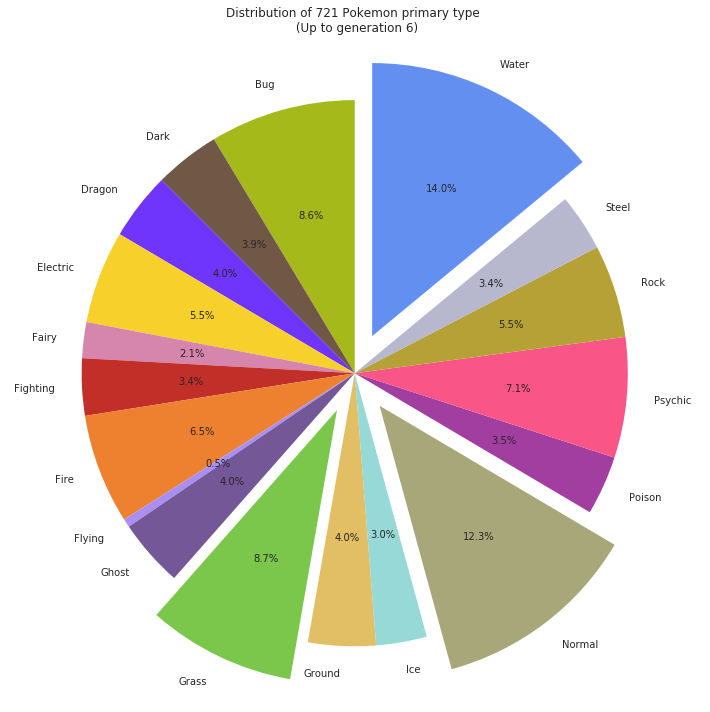

In [4]:
pokemon_types = pokemon_data.groupby('Type 1').count()
# Create a list of colors based on the default colors of each pokemon type
colors = ["#A6B91A",'#705746','#6F35FC','#F7D02C','#D685AD','#C22E28','#EE8130','#A98FF3','#735797',
          "#7AC74C","#E2BF65","#96D9D6","#A8A77A","#A33EA1","#F95587","#B6A136","#B7B7CE","#6390F0" ]

plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(
    pokemon_data.groupby('Type 1').size(),
    labels=pokemon_types.index,
    shadow=False,
    colors=colors,
    explode=(0, 0, 0, 0,0,0,0,0,0,0.15,0,0,0.15,0,0,0,0,0.15),
    startangle=90,
    autopct='%1.1f%%',
    )

plt.title('Distribution of 721 Pokemon primary type \n (Up to generation 6)')
plt.axis('equal')
plt.tight_layout()
plt.show()

<b>2. Box plot of Pokemon stattistics distribution</b>
<br>
First, we should try to understand how each stat (Total, HP, Attack, Defense, Attack Speed, Defense Spped, and Speed) is distributed amongst the entire Pokemon datatbase.

In [5]:
pokemon_stats_data = pokemon_data.drop(['#','Type 1', 'Type 2','Generation', 'Legendary'], axis=1)
pokemon_stats_data.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Name,,,,,,,
Bulbasaur,318,45,49,49,65,65,45
Ivysaur,405,60,62,63,80,80,60
Venusaur,525,80,82,83,100,100,80
VenusaurMega Venusaur,625,80,100,123,122,120,80
Charmander,309,39,52,43,60,50,65


/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


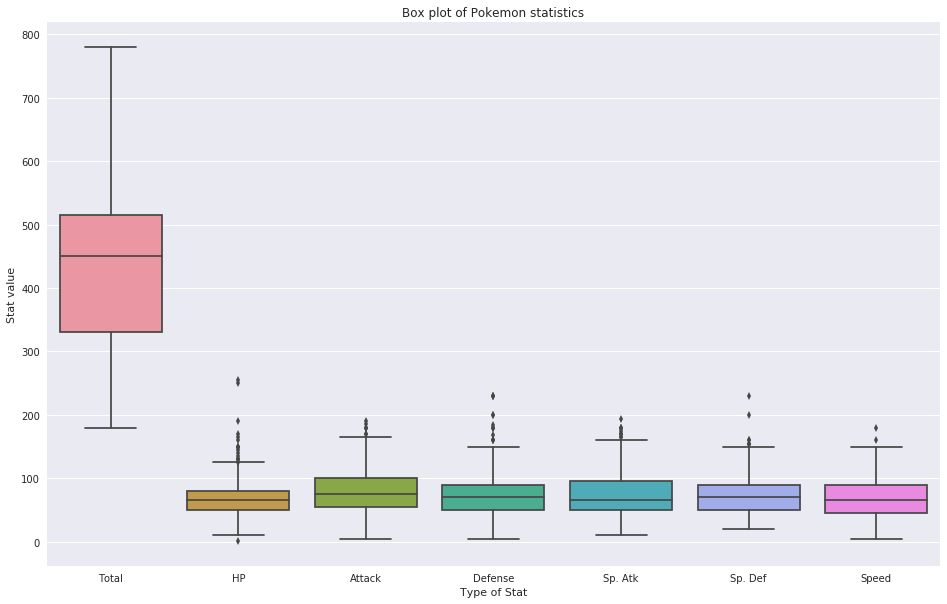

In [6]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=pokemon_stats_data)
plt.title('Box plot of Pokemon statistics')
plt.xlabel('Type of Stat')
plt.ylabel('Stat value')

plt.show()

<b>3a. Distribution of pokemon total stats by type </b>
<br>
For a better understanding of how strong each type of Pokemon are, let's look at how the total stat is distributed by each type.

In [7]:
pokemon_total_type = pokemon_data[['Type 1', 'Total']]
pokemon_total_type.head()

,Type 1,Total
Name,,
Bulbasaur,Grass,318
Ivysaur,Grass,405
Venusaur,Grass,525
VenusaurMega Venusaur,Grass,625
Charmander,Fire,309


/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


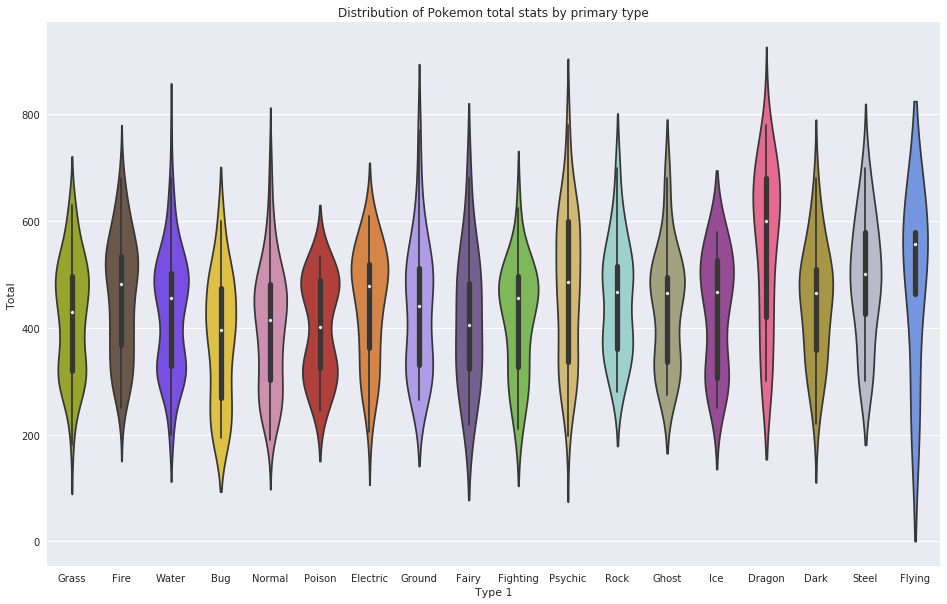

In [8]:
#Color palatter based on each type of pokemon
color = ["#A6B91A",'#705746','#6F35FC','#F7D02C','#D685AD','#C22E28','#EE8130','#A98FF3','#735797',
          "#7AC74C","#E2BF65","#96D9D6","#A8A77A","#A33EA1","#F95587","#B6A136","#B7B7CE","#6390F0" ]

#Plotting graph
plt.figure(figsize=(16, 10))
sns.violinplot(x='Type 1', y='Total', data=pokemon_total_type, palette=color)
plt.title('Distribution of Pokemon total stats by primary type')

plt.show()

<b> 3b. Bar chart of strongest Pokemon (with legendaries) </b>
<br>
Bar chart showing the top three strongest pokemon based on total stats of each type. By showing the strongest from each type, players can have a better sense of how to find counters to other pokemons. By displaying the top three from each type, this can give the player more options and resolve the issue when the top Pokemons under a certain type have the same total stats.

In [9]:
pokemon_type_strongest = pokemon_data.groupby('Type 1')['Total'].nlargest(3)
pokemon_type_strongest.head()

Type 1  Name                   
Bug     PinsirMega Pinsir          600
        ScizorMega Scizor          600
        HeracrossMega Heracross    600
Dark    Yveltal                    680
        HoundoomMega Houndoom      600
Name: Total, dtype: int64

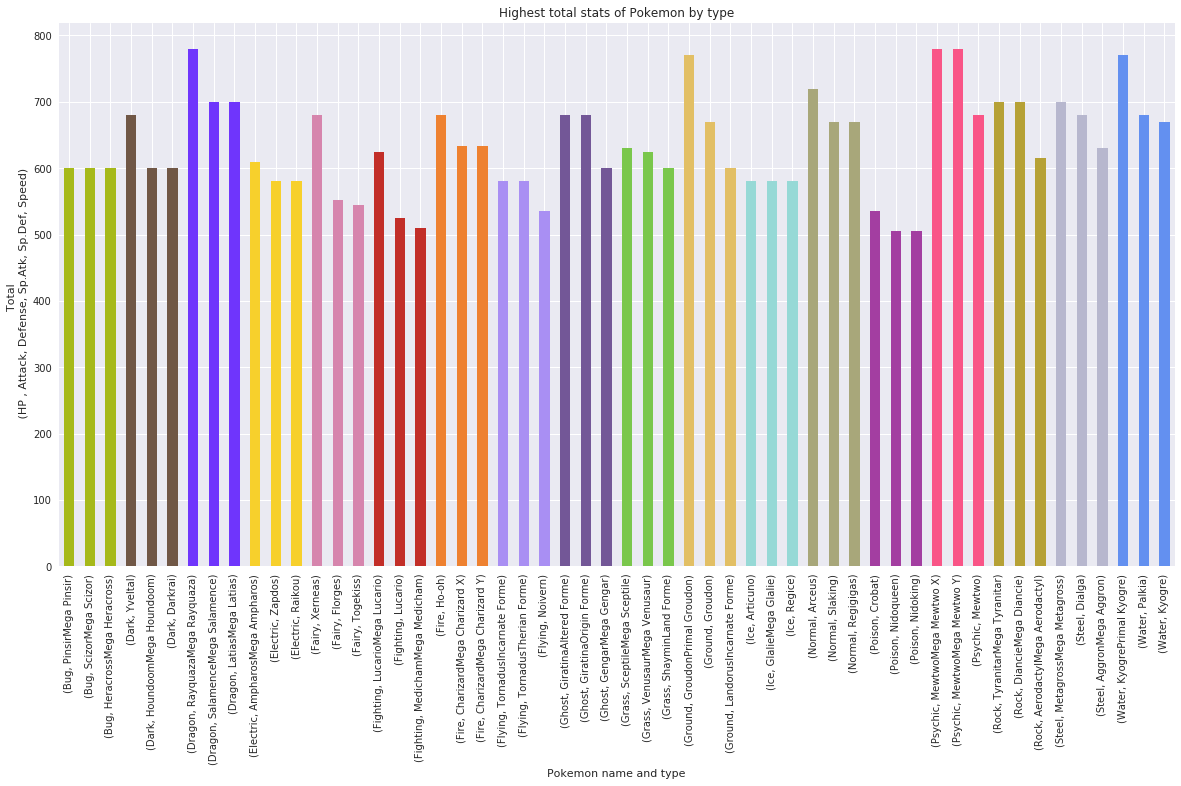

In [10]:
flatten = lambda l: [item for sublist in l for item in sublist]

#Color based on default colors of each type of Pokemon.
color = ["#A6B91A",'#705746','#6F35FC','#F7D02C','#D685AD','#C22E28','#EE8130','#A98FF3','#735797',
          "#7AC74C","#E2BF65","#96D9D6","#A8A77A","#A33EA1","#F95587","#B6A136","#B7B7CE","#6390F0" ]

color = flatten(zip(color,color,color))

plt.figure(figsize=(16, 6))
pokemon_type_strongest.plot(kind="bar", 
                            color=color, 
                            figsize=(20,10))
plt.title("Highest total stats of Pokemon by type")
plt.xlabel("Pokemon name and type")
plt.ylabel("Total \n (HP , Attack, Defense, Sp.Atk, Sp.Def, Speed)")
plt.xticks(rotation='vertical')
plt.show()

<b> 3c. Bar chart of strongest Pokemon (without legendaries) </b>
<br>
Since many players might not have access to legendary Pokemons, it is important to also show the strongest non-legendary Pokemons.

In [11]:
pokemon_type_nolegendary = pokemon_data[pokemon_data['Legendary'] == False]
pokemon_nolegend_stats = pokemon_type_nolegendary.groupby('Type 1')['Total'].nlargest(3)
pokemon_nolegend_stats.head()

Type 1  Name                   
Bug     PinsirMega Pinsir          600
        ScizorMega Scizor          600
        HeracrossMega Heracross    600
Dark    HoundoomMega Houndoom      600
        Hydreigon                  600
Name: Total, dtype: int64

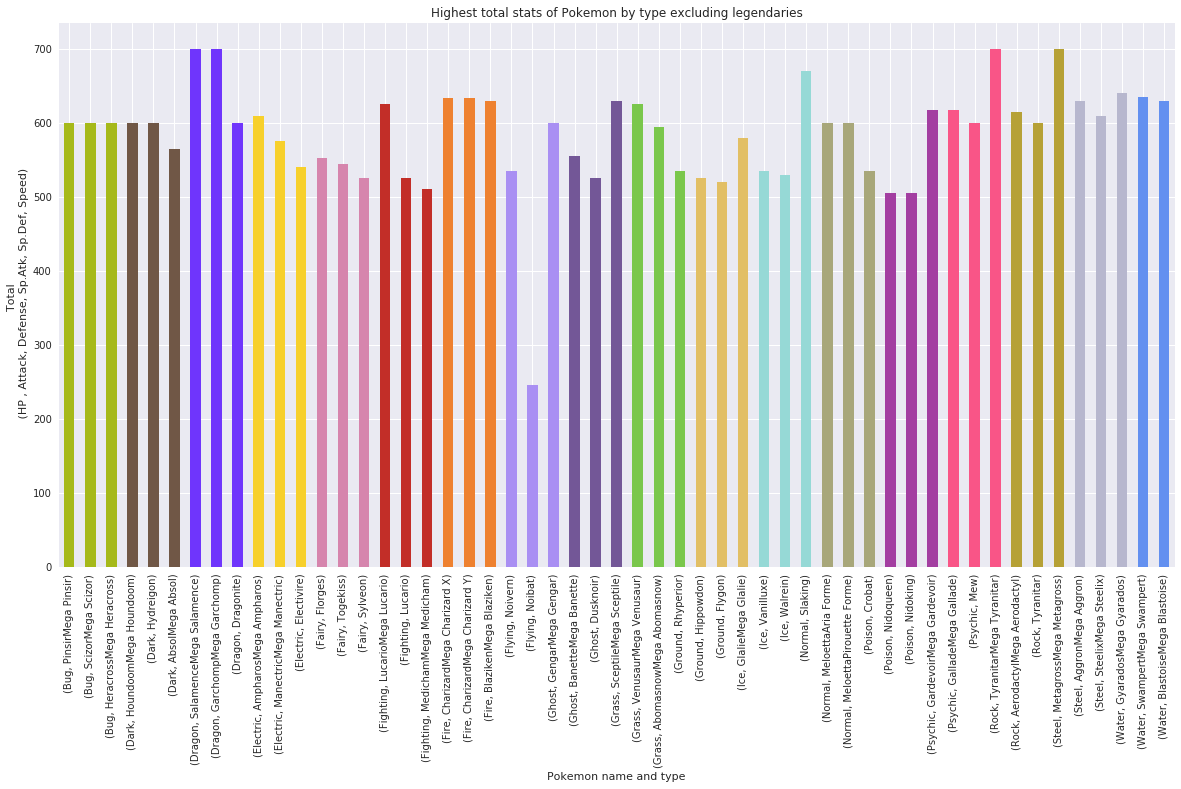

In [12]:
flatten = lambda l: [item for sublist in l for item in sublist]

#Color based on default colors of each type of Pokemon.
color = ["#A6B91A",'#705746','#6F35FC','#F7D02C','#D685AD','#C22E28','#EE8130','#A98FF3','#735797',
          "#7AC74C","#E2BF65","#96D9D6","#A8A77A","#A33EA1","#F95587","#B6A136","#B7B7CE","#6390F0" ]

color = flatten(zip(color,color,color))

plt.figure(figsize=(16, 6))
pokemon_nolegend_stats.plot(kind="bar", 
                            color=color, 
                            figsize=(20,10))
plt.title("Highest total stats of Pokemon by type excluding legendaries")
plt.xlabel("Pokemon name and type")
plt.ylabel("Total \n (HP , Attack, Defense, Sp.Atk, Sp.Def, Speed)")
plt.xticks(rotation='vertical')
plt.show()

<b> 4. Fastest Pokemons barchart </b>
<br>
When it comes to getting away from trouble or making the first move in a Pokemon battle, it is important to know the speed of your Pokemon. The following bar chart shows the top ten fastest Pokemons.

In [13]:
pokemon_fastest = pokemon_data['Speed'].nlargest(10)
pokemon_fastest.head()

Name
DeoxysSpeed Forme            180
Ninjask                      160
AlakazamMega Alakazam        150
AerodactylMega Aerodactyl    150
DeoxysNormal Forme           150
Name: Speed, dtype: int64

/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


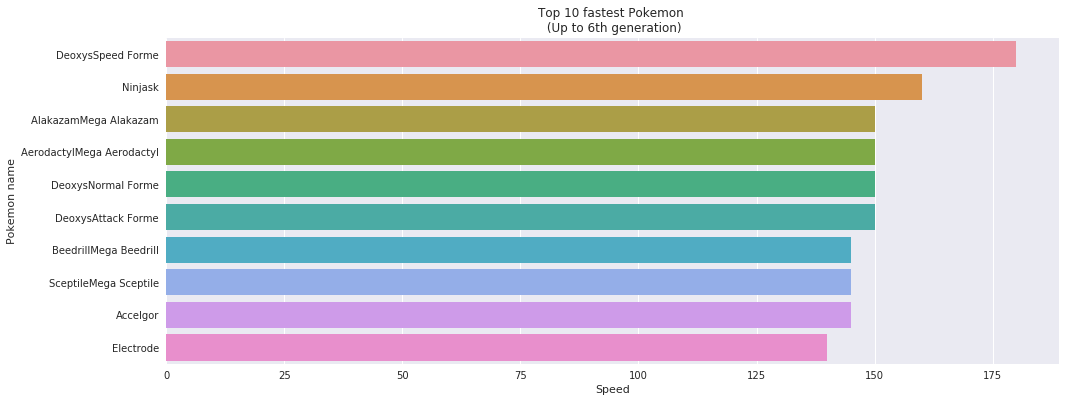

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(x=pokemon_fastest[:], y=pokemon_fastest.index)
plt.title("Top 10 fastest Pokemon \n (Up to 6th generation)")
plt.xlabel("Speed")
plt.ylabel("Pokemon name")
plt.show()

<b> 5. Scatter plot distribution of Total stats vs. Speed </b>
<br>
This scatter plot provides a distribution of how fast each pokemon are compared to their total stats. 

In [15]:
pokemon_data[['Total','Speed']].head(10)

,Total,Speed
Name,,
Bulbasaur,318,45
Ivysaur,405,60
Venusaur,525,80
VenusaurMega Venusaur,625,80
Charmander,309,65
Charmeleon,405,80
Charizard,534,100
CharizardMega Charizard X,634,100
CharizardMega Charizard Y,634,100


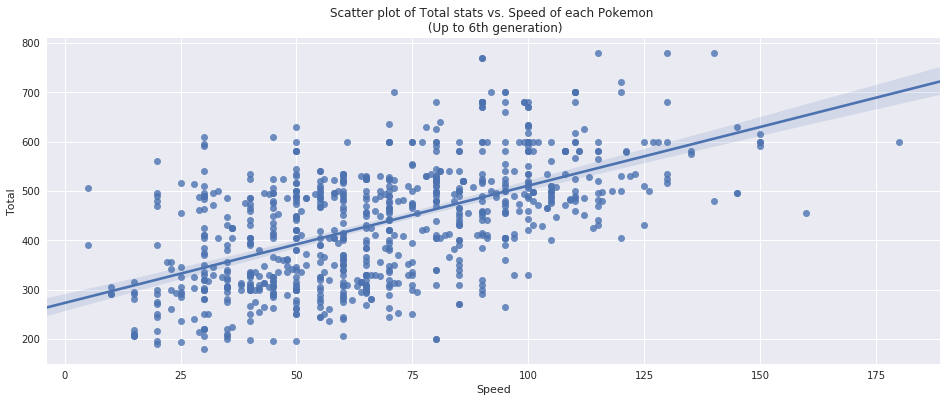

In [16]:
sns.set(color_codes=True)

plt.figure(figsize=(16, 6))
sns.regplot(x="Speed", y="Total", data=pokemon_data)
plt.title('Scatter plot of Total stats vs. Speed of each Pokemon \n (Up to 6th generation)')
plt.show()

<b> 6. Joint plot of Pokemon distribution based on Defense vs. Attack </b>
<br>
To provide players with an idea of how strong regular pokemons are, legendary Pokemons are filtered out from the dataset and a distribution of the Defense vs. Attack stats of each Pokemon are plotted.

In [17]:
pokemon_nolegendary = pokemon_data[pokemon_data['Legendary'] == False]
pokemon_nolegendary[['Attack','Defense']].head(10)

,Attack,Defense
Name,,
Bulbasaur,49,49
Ivysaur,62,63
Venusaur,82,83
VenusaurMega Venusaur,100,123
Charmander,52,43
Charmeleon,64,58
Charizard,84,78
CharizardMega Charizard X,130,111
CharizardMega Charizard Y,104,78


/srv/app/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


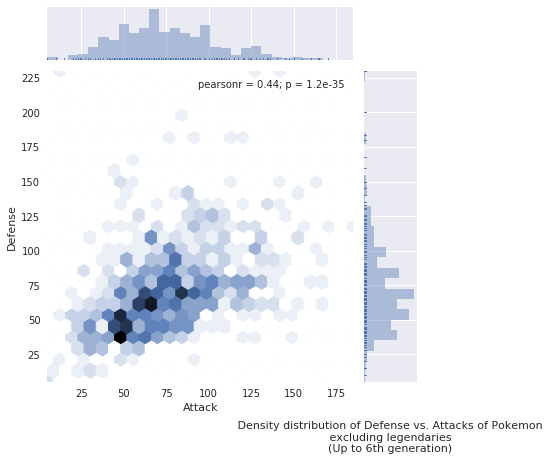

In [18]:
sns.jointplot(x='Attack', y='Defense', data=pokemon_nolegendary, kind='hex', marginal_kws=dict(bins=30, rug=True))
#Could not put title on top of plot because the histogram blocks the title text. 
#Instead title is placed at the bottom of the graph using a mock 'xlabel'.
plt.xlabel('\n \n \n Density distribution of Defense vs. Attacks of Pokemon \n excluding legendaries \n(Up to 6th generation)')
plt.show()

<b> 7. Number of Legendary Pokemon in each generation </b>
<br>
This barplot displays the amount of legendary Pokemons in each generation to provide players who "want to catch them all" an idea of how many legendary Pokemons are in the game.

In [19]:
pokemon_legendary = pokemon_data[pokemon_data['Legendary'] == True]
pokemon_legendary_gen = pokemon_legendary.groupby('Generation').size()
pokemon_legendary_gen.head()

Generation
1     6
2     5
3    18
4    13
5    15
dtype: int64

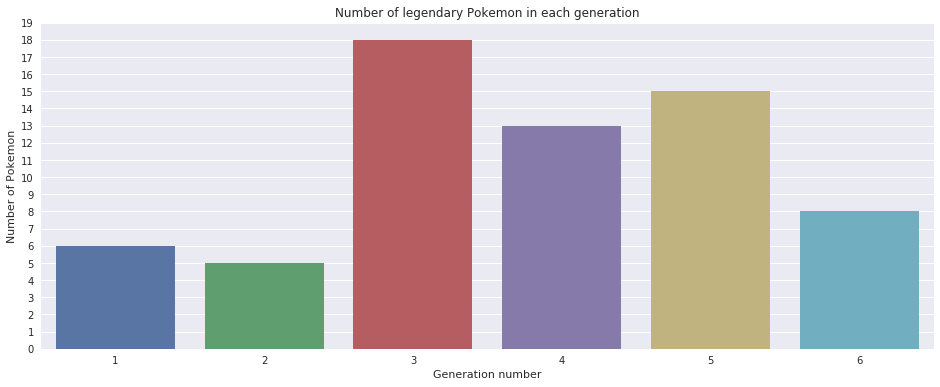

In [20]:
plt.figure(figsize=(16, 6))
sns.barplot(x=pokemon_legendary_gen.index, y=pokemon_legendary_gen[:])
plt.title("Number of legendary Pokemon in each generation")
plt.xlabel("Generation number")
plt.ylabel("Number of Pokemon")
#Rename yticks to show integer values 
plt.yticks(np.arange(20),np.arange(20))
plt.show()

<a id='ds2'></a>
# Dataset 2: Cryptocurrencies
___

### Background:
Link to Dataset: https://www.kaggle.com/akababa/cryptocurrencies

Description:
<br>
Historical price data for 1192 cryptocurrencies (excluding BTC) between 11 September, 2013 to 26 June, 2017.

From Kaggle link: 
<br>
<b>Context</b>
<br>
Thousands of cryptocurrencies have sprung up in the past few years. Can you predict which one will be the next BTC?
<br>
<b>Content</b>
<br>
The dataset contains daily opening, high, low, close, and trading volumes for over 1200 cryptocurrencies (excluding bitcoin).
<br>
<b>Acknowledgements</b>
<br>
https://timescaledata.blob.core.windows.net/datasets/crypto_data.tar.gz
<br>
<b>Inspiration</b>
<br>
Speculative forces are always at work on cryptocurrency exchanges - but do they contain any statistically significant features?


By analyzing the data of crypto currency excluding Bitcoin (BTC), we can get an idea of how the cyrpto currency economy is evoling and which alternative coins are the next competitor to bitcoin currency. In this analysis, we will see
<ul>
    <li> Top traded crypto currencies</li>
    <li> Highest and lowest prices of top traded currencies</li>
    <li> Price trend of Ethereum (ETH) </li>
    <li> Frequencies of volume size traded of Ethereum </li>
    <li> Volume trend of Litecoin (LTC)</li>
</ul>

This analysis focuses on the most popular crypto currencies to provide reader with better investment strategies outside of Bitcoin. There is a focus on Ethereum and Litecoin because of the populairty of these alternative coins. Since Ethereum provides extra features that Bitcoin doesn't, having a better understanding of Ethereum trends provides investors information on what Bitcoin's competitor currency is like.

<a id='dpm2'></a>
## Data Preprocessing and Manipulation

Please download the "crypto_prices.csv" file into folder containing this jupeter notebook. Below shows the first five columns of the dataframe where the dataset is indexed under Symbol of crypto currency.

In [21]:
crypto_data = pd.read_csv("crypto_prices.csv", index_col = 'Symbol')

#Extract DateTime columns into 'year','month'
crypto_data['year'] = pd.DatetimeIndex(crypto_data['DateTime']).year
crypto_data['month'] = pd.DatetimeIndex(crypto_data['DateTime']).month

crypto_data.head()

,DateTime,Open,High,Low,Close,Volume,VolumeBTC,year,month
Symbol,,,,,,,,,
EOC,6/26/2017 20:00,5.700000e-07,5.700000e-07,5.700000e-07,5.700000e-07,0.00,0.00,2017,6
RATIO,6/26/2017 20:00,1.600000e-07,1.600000e-07,1.600000e-07,1.600000e-07,0.00,0.00,2017,6
CPC,6/26/2017 20:00,2.335000e-04,2.430000e-04,2.180000e-04,2.139000e-04,90175.87,20.64,2017,6
RYC,6/26/2017 20:00,1.600000e-07,1.600000e-07,1.600000e-07,1.600000e-07,0.00,0.00,2017,6
XBS,6/26/2017 20:00,4.200000e-04,4.200000e-04,4.200000e-04,4.200000e-04,0.00,0.00,2017,6


Since there is data for each crypto currecny in every day between 11 September, 2013 to 26 June, 2017, averages values of each month are made for more clear presentation. (Examples of this will be seen in data visulization.)

In [22]:
#Taking monthly averages of each value sorted by symbol and month/year
monthly_avgs = crypto_data.groupby(['Symbol','year','month']).mean()
monthly_avgs.head()

Open          High           Low         Close  \
Symbol year month                                                           
1337   2015 12     4.500000e-08  5.000000e-08  4.000000e-08  4.250000e-08   
       2016 1      5.903226e-08  8.096774e-08  4.870968e-08  6.096774e-08   
            2      8.379310e-08  9.758621e-08  7.379310e-08  8.413793e-08   
            3      7.290323e-08  8.419355e-08  6.096774e-08  7.419355e-08   
            4      6.833333e-08  7.400000e-08  6.233333e-08  6.600000e-08   

                         Volume  VolumeBTC  
Symbol year month                           
1337   2015 12     2.429563e+04   0.000894  
       2016 1      4.234332e+05   0.036721  
            2      8.028763e+05   0.069503  
            3      4.495180e+06   0.316678  
            4      5.057679e+06   0.336700

<a id='dv2'></a>
## Data Visualization

<b> 1a. Top 20 traded volumes of crypto currencies </b>
<br>
This bar chart gives the top 20 traded volumes of crypto currencies between 11 September, 2013 to 26 June, 2017. This provides investors on which crypto currencies are most traded.

In [23]:
crypto_max_vol = crypto_data.groupby(['Symbol'], sort=False)['Volume'].max().nlargest(20)
crypto_max_vol.head()

Symbol
CSH      3.113652e+10
DOGE     2.466674e+10
BCN      1.963753e+10
HTML5    1.145282e+10
MOON     1.032017e+10
Name: Volume, dtype: float64

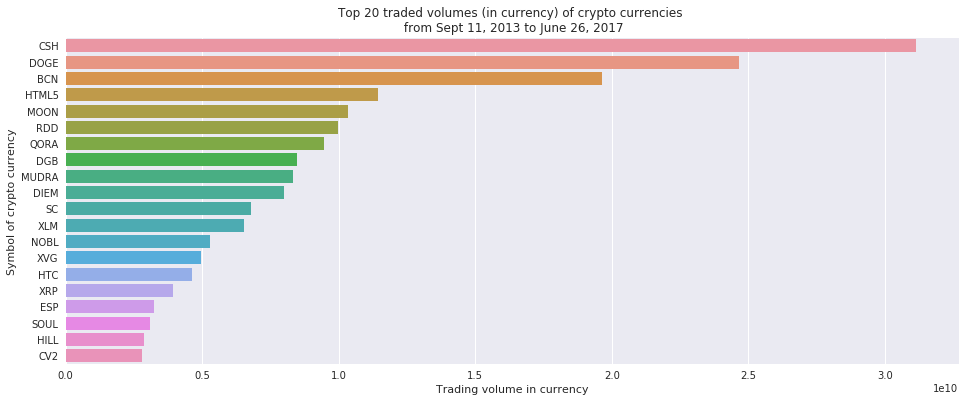

In [24]:
plt.figure(figsize=(16, 6))
sns.barplot(x=crypto_max_vol[:], y=crypto_max_vol.index)
plt.title("Top 20 traded volumes (in currency) of crypto currencies \n from Sept 11, 2013 to June 26, 2017")
plt.xlabel("Trading volume in currency")
plt.ylabel("Symbol of crypto currency")
plt.show()

<b> 1b. Top 20 traded volumes (in BTC) of crypto currencies </b>
<br>
An alternative way to trade alternative currency is using the BTC currency. This bar chart gives the top 20 traded volumes (in BTC) of crypto currencies between 11 September, 2013 to 26 June, 2017.

In [25]:
crypto_max_volBTC = crypto_data.groupby(['Symbol'], sort=False)['VolumeBTC'].max().nlargest(20)
crypto_max_volBTC.head()

Symbol
LTC    3690901.05
ETH     275512.77
ETC     194856.19
XRP     162022.40
XLM     142389.44
Name: VolumeBTC, dtype: float64

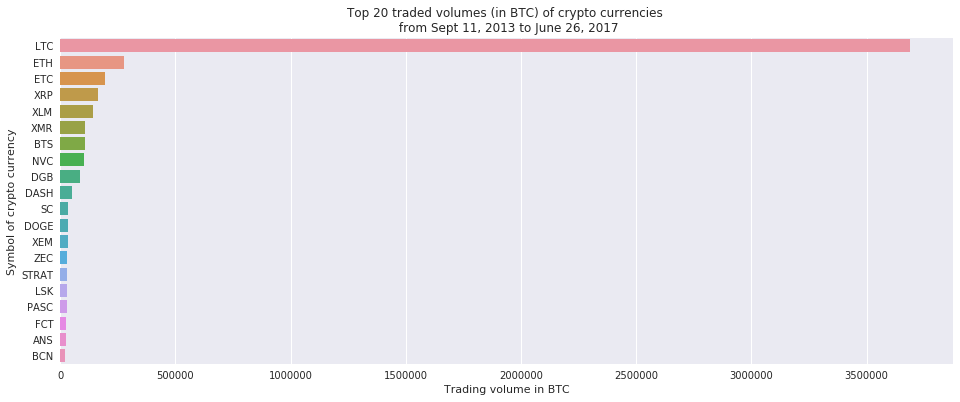

In [26]:
plt.figure(figsize=(16, 6))
sns.barplot(x=crypto_max_volBTC[:], y=crypto_max_volBTC.index)
plt.title("Top 20 traded volumes (in BTC) of crypto currencies \n from Sept 11, 2013 to June 26, 2017")
plt.xlabel("Trading volume in BTC")
plt.ylabel("Symbol of crypto currency")
plt.show()

<b> 2. Comparisons of High/Low prices of top 6 traded crypto currency in BTC</b>
<br>
Since many crypto currency investors use BTC to trade crypto currency, this bar chart compares the highest and lowest prices of the top 6 traded currencies in BTC. 

In [27]:
#Extract High and Low values for each crypto currency.
crypto_high= crypto_data.groupby(['Symbol']).max()['High']
crypto_low= crypto_data.groupby(['Symbol']).min()['Low']

#Subgroup of top 6 traded currencies.
subgroup_syb = crypto_max_volBTC.index[:6]
subgroup_high = [ float(crypto_high.loc[item]) for item in subgroup_syb ]
subgroup_low = [ crypto_low.loc[item] for item in subgroup_syb ]

#Putting data into new dataframe.
subgroup = pd.DataFrame(columns = ['Symbol', 'High','Low'])
subgroup['Symbol'] = subgroup_syb
subgroup['High'] = subgroup_high
subgroup['Low'] = subgroup_low

#Using pd.melt() to easily display two column bar chart into one plot.
subgroup = pd.melt(subgroup, id_vars=['Symbol'])
subgroup.head()

,Symbol,variable,value
0,LTC,High,0.062410
1,ETH,High,0.152300
2,ETC,High,0.010000
3,XRP,High,0.000243
4,XLM,High,0.000049


/srv/app/venv/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1152x720 with 0 Axes>

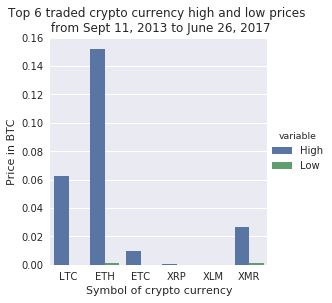

In [28]:
plt.figure(figsize=(16, 10))
sns.factorplot(x='Symbol', y='value', hue='variable', data=subgroup, kind='bar')
plt.title("Top 6 traded crypto currency high and low prices \n from Sept 11, 2013 to June 26, 2017")
plt.xlabel("Symbol of crypto currency")
plt.ylabel('Price in BTC')
plt.show

<b> 3a. Price trend of Ethereum based on montly averages of each price type</b>
<br>
Due to the popularity of Ethereum, investors will find the analysis of high, low, opening, and closing price trends relevant. Monthly averages of each price type are made to make the plot easier to read.

In [29]:
ETH_data = crypto_data.groupby(['Symbol']).get_group('ETH')
ETH_data.groupby(['year','month']).mean().head()

Open      High       Low     Close        Volume    VolumeBTC
year month                                                                   
2015 8      0.005334  0.009643  0.004552  0.005455  1.124701e+06  6077.798846
     9      0.004229  0.004385  0.003918  0.004127  6.878079e+05  2636.608667
     10     0.002478  0.002690  0.002303  0.002490  7.795880e+05  1965.716452
     11     0.002682  0.002819  0.002473  0.002654  8.625970e+05  2197.954333
     12     0.002090  0.002170  0.002007  0.002081  4.432679e+05   929.898065

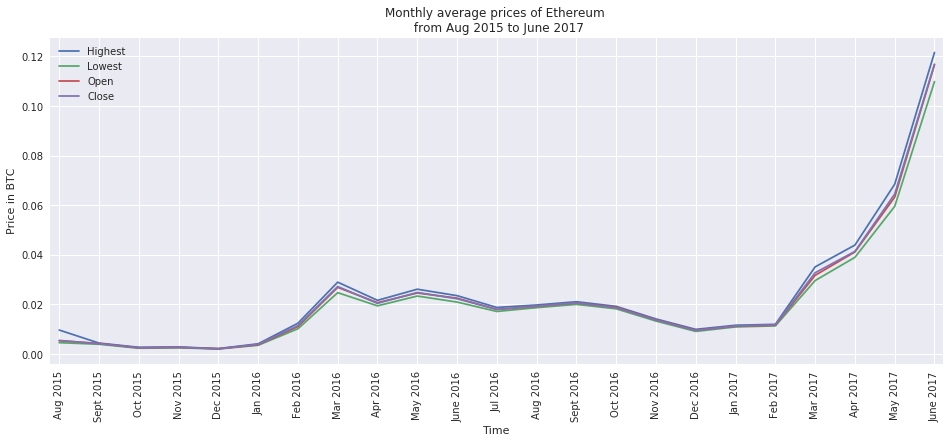

In [30]:
#Renaming xticks based on month and year.
x_ticks_labels = ['Aug 2015','Sept 2015','Oct 2015','Nov 2015','Dec 2015',
                  'Jan 2016','Feb 2016','Mar 2016','Apr 2016','May 2016','June 2016',
                  'Jul 2016','Aug 2016','Sept 2016','Oct 2016','Nov 2016','Dec 2016',
                  'Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','June 2017']

#Plotting graph
fig, ax = plt.subplots(figsize=(16,6))
ETH_data.groupby(['year','month']).mean()['High'].plot(ax=ax)
ETH_data.groupby(['year','month']).mean()['Low'].plot(ax=ax)
ETH_data.groupby(['year','month']).mean()['Open'].plot(ax=ax)
ETH_data.groupby(['year','month']).mean()['Close'].plot(ax=ax)
plt.title('Monthly average prices of Ethereum \n from Aug 2015 to June 2017')
plt.legend(['Highest','Lowest','Open','Close'], loc='upper left')
plt.ylabel('Price in BTC')
plt.xlabel('Time')
ax.margins(x=0.01)
plt.xticks(np.arange(23), x_ticks_labels, rotation='vertical')
plt.show()

<b>3b. Swarm plot of Ethereum prices from Janurary 2017 to June 2017</b>
<br>
From the plot above, the price of Ethereum increased significantly in the year 2017. To get a better understanding of how price is distrubuted each day per month, let's create a swarm plot to give the read a better idea of price fluxuations within that time frame (Janurary 2017 to June 2017).

In [31]:
ETH_data_2017 = ETH_data.groupby('year').get_group(2017)
ETH_data_2017.head()

,DateTime,Open,High,Low,Close,Volume,VolumeBTC,year,month
Symbol,,,,,,,,,
ETH,6/26/2017 20:00,0.1050,0.1051,0.09281,0.09716,536452.26,53202.65,2017,6
ETH,6/25/2017 20:00,0.1112,0.1146,0.09286,0.10500,1490351.15,152471.66,2017,6
ETH,6/24/2017 20:00,0.1186,0.1204,0.10360,0.11120,850435.53,95821.56,2017,6
ETH,6/23/2017 20:00,0.1214,0.1222,0.11850,0.11860,357689.12,43076.71,2017,6
ETH,6/22/2017 20:00,0.1201,0.1247,0.11850,0.12140,450954.05,54654.83,2017,6


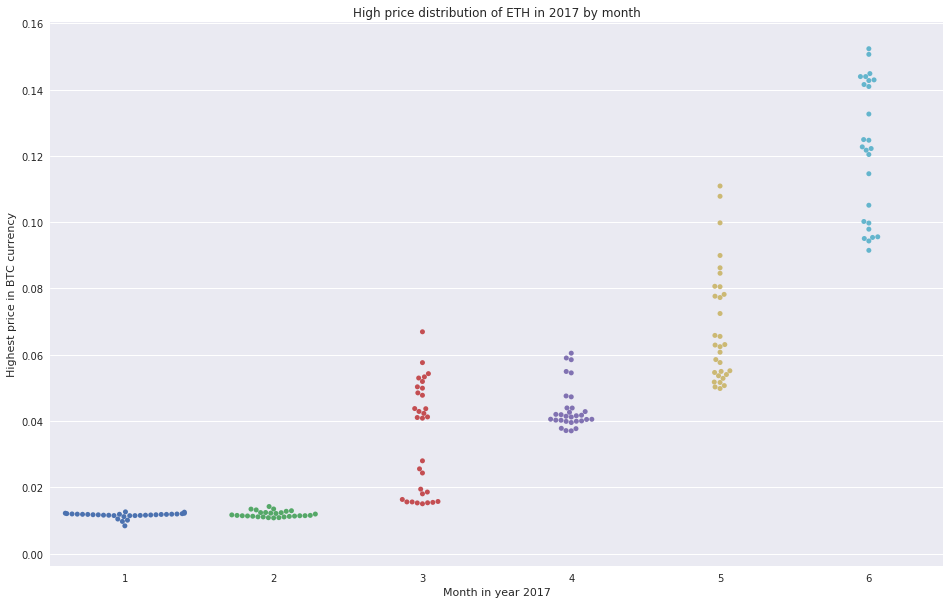

In [32]:
plt.figure(figsize=(16, 10))
sns.swarmplot(x='month', y='High', data=ETH_data_2017)
plt.title('High price distribution of ETH in 2017 by month')
plt.xlabel('Month in year 2017')
plt.ylabel('Highest price in BTC currency')
plt.show()

<b> 4. Histogram of volume traded (in BTC) of ETH</b>
<br>
This histogram provides the frequnecy in the size of volume traded of Ethereum. Bins are chosen so that each plot represent about 10,000 volume in BTC.

In [33]:
ETH_vol = crypto_data.groupby(['Symbol'], sort=False).get_group('ETH')
ETH_vol.head()

,DateTime,Open,High,Low,Close,Volume,VolumeBTC,year,month
Symbol,,,,,,,,,
ETH,6/26/2017 20:00,0.1050,0.1051,0.09281,0.09716,536452.26,53202.65,2017,6
ETH,6/25/2017 20:00,0.1112,0.1146,0.09286,0.10500,1490351.15,152471.66,2017,6
ETH,6/24/2017 20:00,0.1186,0.1204,0.10360,0.11120,850435.53,95821.56,2017,6
ETH,6/23/2017 20:00,0.1214,0.1222,0.11850,0.11860,357689.12,43076.71,2017,6
ETH,6/22/2017 20:00,0.1201,0.1247,0.11850,0.12140,450954.05,54654.83,2017,6


<Figure size 1152x432 with 0 Axes>

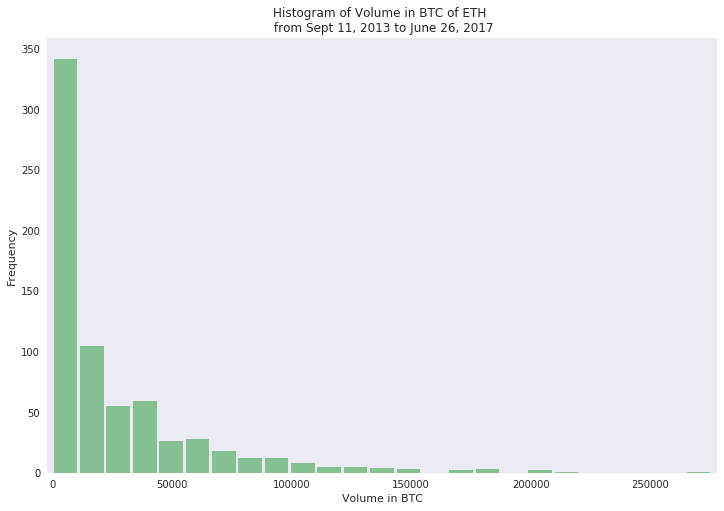

In [34]:
plt.figure(figsize=(16, 6))
ETH_vol.hist(column='VolumeBTC', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.title('Histogram of Volume in BTC of ETH \n from Sept 11, 2013 to June 26, 2017')
plt.xlabel('Volume in BTC')
plt.ylabel('Frequency')
plt.margins(x=0.01)
plt.show()

<b> 5a. Plot of trading Volume in BTC of LTC </b>
<br>
It is strange that LTC had the highest trading volume in BTC of all time. This analysis shows that LTC had a single peak on July 2015 but is relatively less traded on other dates.

In [35]:
LTC_VolBTC = crypto_data.groupby(['Symbol'], sort=False).get_group('LTC')
LTC_VolBTC.groupby(['year','month']).mean()['VolumeBTC'].head()

year  month
2013  9         0.373000
      10        1.236019
      11       11.587563
      12        8.403468
2014  1         3.284003
Name: VolumeBTC, dtype: float64

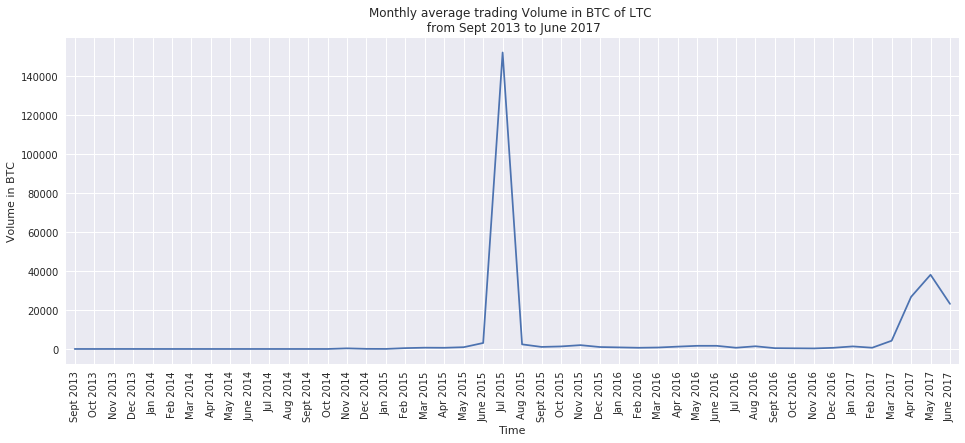

In [36]:
#Define xticks for each month and year.
x_ticks_labels = ['Sept 2013','Oct 2013','Nov 2013','Dec 2013',
                  'Jan 2014','Feb 2014','Mar 2014','Apr 2014','May 2014','June 2014',
                  'Jul 2014','Aug 2014','Sept 2014','Oct 2014','Nov 2014','Dec 2014',
                  'Jan 2015','Feb 2015','Mar 2015','Apr 2015','May 2015','June 2015',
                  'Jul 2015','Aug 2015','Sept 2015','Oct 2015','Nov 2015','Dec 2015',
                  'Jan 2016','Feb 2016','Mar 2016','Apr 2016','May 2016','June 2016',
                  'Jul 2016','Aug 2016','Sept 2016','Oct 2016','Nov 2016','Dec 2016',
                  'Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','June 2017']

#Plotting figure
fig, ax = plt.subplots(figsize=(16,6))
LTC_VolBTC.groupby(['year','month']).mean()['VolumeBTC'].plot(ax=ax)
plt.title('Monthly average trading Volume in BTC of LTC \n from Sept 2013 to June 2017')
plt.ylabel('Volume in BTC')
plt.xlabel('Time')
ax.margins(x=0.01)
plt.xticks(np.arange(46), x_ticks_labels, rotation='vertical')
plt.show()

<b>5b. Lollipop plot of LTC trade Volume in BTC between June 2015 to August 2015</b>
<br>
Notice that in the plot above, there is a signicant peak at July 2015. Let's analyze how the price fluxuates by day between June 2015 to August 2015 without taking averages.

In [38]:
LTC_2017 = LTC_VolBTC.groupby(['year']).get_group(2015)
LTC_june_2017 = LTC_2017.loc[LTC_2017['month'] == 6].iloc[::-1]
LTC_july_2017 = LTC_2017.loc[LTC_2017['month'] == 7].iloc[::-1]
LTC_aug_2017 = LTC_2017.loc[LTC_2017['month'] == 8].iloc[::-1]
LTC_peak = pd.concat([LTC_june_2017, LTC_july_2017, LTC_aug_2017])
LTC_peak.head()

,DateTime,Open,High,Low,Close,Volume,VolumeBTC,year,month
Symbol,,,,,,,,,
LTC,6/1/2015 20:00,0.007219,0.007432,0.007138,0.007354,87827.34,640.61,2015,6
LTC,6/2/2015 20:00,0.007354,0.007578,0.007304,0.007478,65333.78,487.03,2015,6
LTC,6/3/2015 20:00,0.007478,0.007540,0.007356,0.007426,63815.58,473.84,2015,6
LTC,6/4/2015 20:00,0.007426,0.007738,0.007390,0.007688,83893.33,634.62,2015,6
LTC,6/5/2015 20:00,0.007688,0.007904,0.007519,0.007781,32180.33,251.77,2015,6


In [39]:
#Setting custom x-ticks
def month_list(month,days):
    month_day = []
    for day in range(1,days+1):
        month_day.append(month+' '+str(day))
        
    return month_day

june = month_list('June', 30)
july = month_list('July', 31)
aug = month_list('August', 31)
x_ticks = june + july + aug

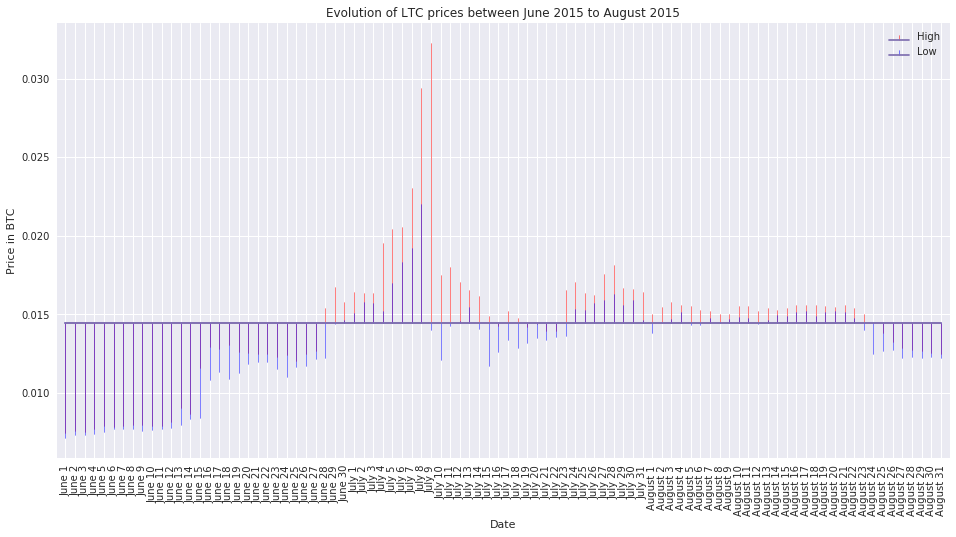

In [40]:
#Plotting figure
plt.figure(figsize=(16, 8))

#High stemline
(markers, stemlines, baseline)  = plt.stem(LTC_peak['High'], markerfmt=' ', bottom=LTC_peak['High'].mean())
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5 )

#Low stemline
(markers, stemlines, baseline)  = plt.stem(LTC_peak['Low'], markerfmt=' ', bottom=LTC_peak['High'].mean())
plt.setp(stemlines, linestyle="-", color="blue", linewidth=0.5 )

plt.legend(['High','Low'],loc="upper right")
plt.title("Evolution of LTC prices between June 2015 to August 2015")
plt.xlabel('Date')
plt.ylabel('Price in BTC')
plt.xticks(np.arange(92), x_ticks, rotation = 'vertical')
plt.margins(x=0.01)
plt.show()